In [126]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
import types



from dataset import Dataset as dataset
from sklearn.linear_model import LogisticRegression
from typing import List
from skrebate import ReliefF
from pandas import read_csv
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report




from sklearn import preprocessing

from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,GridSearchCV


In [77]:
train1 = pd.read_csv('C:/Users/kushagra/Desktop/train.csv')
train_labels = pd.read_csv('C:/Users/kushagra/Desktop/train_labels.csv')
train2 = [train1, train_labels]

train = pd.concat(train2)
# merged the train with train labels (this adds the target column called 'status_group')

In [78]:
train.head()

,amount_tsh,basin,construction_year,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,funder,gps_height,...,source,source_class,source_type,status_group,subvillage,ward,water_quality,waterpoint_type,waterpoint_type_group,wpt_name
0,6000.0,Lake Nyasa,1999.0,3/14/2011,5.0,gravity,gravity,gravity,Roman,1390.0,...,spring,groundwater,spring,functional,Mnyusi B,Mundindi,soft,communal standpipe,communal standpipe,none
1,0.0,Lake Victoria,2010.0,3/6/2013,2.0,gravity,gravity,gravity,Grumeti,1399.0,...,rainwater harvesting,surface,rainwater harvesting,functional,Nyamara,Natta,soft,communal standpipe,communal standpipe,Zahanati
2,25.0,Pangani,2009.0,2/25/2013,4.0,gravity,gravity,gravity,Lottery Club,686.0,...,dam,surface,dam,functional,Majengo,Ngorika,soft,communal standpipe multiple,communal standpipe,Kwa Mahundi
3,0.0,Ruvuma / Southern Coast,1986.0,1/28/2013,63.0,submersible,submersible,submersible,Unicef,263.0,...,machine dbh,groundwater,borehole,non functional,Mahakamani,Nanyumbu,soft,communal standpipe multiple,communal standpipe,Zahanati Ya Nanyumbu
4,0.0,Lake Victoria,0.0,7/13/2011,1.0,gravity,gravity,gravity,Action In A,0.0,...,rainwater harvesting,surface,rainwater harvesting,functional,Kyanyamisa,Nyakasimbi,soft,communal standpipe,communal standpipe,Shuleni


In [79]:
train.describe()

,amount_tsh,construction_year,district_code,gps_height,id,latitude,longitude,num_private,population,region_code
count,59400.000000,59400.000000,59400.000000,59400.000000,118800.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,1300.652475,5.629747,668.297239,37115.131768,-5.706033e+00,34.077427,0.474141,179.909983,15.297003
std,2997.574558,951.620547,9.633649,693.116350,21453.038079,2.946019e+00,6.567432,12.236230,471.482176,17.587406
min,0.000000,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000,0.000000,18519.750000,-8.540621e+00,33.090347,0.000000,0.000000,5.000000
50%,0.000000,1986.000000,3.000000,369.000000,37061.500000,-5.021597e+00,34.908743,0.000000,25.000000,12.000000
75%,20.000000,2004.000000,5.000000,1319.250000,55656.500000,-3.326156e+00,37.178387,0.000000,215.000000,17.000000
max,350000.000000,2013.000000,80.000000,2770.000000,74247.000000,-2.000000e-08,40.345193,1776.000000,30500.000000,99.000000


In [80]:
train.dtypes

amount_tsh               float64
basin                     object
construction_year        float64
date_recorded             object
district_code            float64
extraction_type           object
extraction_type_class     object
extraction_type_group     object
funder                    object
gps_height               float64
id                         int64
installer                 object
latitude                 float64
lga                       object
longitude                float64
management                object
management_group          object
num_private              float64
payment                   object
payment_type              object
permit                    object
population               float64
public_meeting            object
quality_group             object
quantity                  object
quantity_group            object
recorded_by               object
region                    object
region_code              float64
scheme_management         object
scheme_nam

In [81]:
test = pd.read_csv('C:/Users/kushagra/Desktop/test_c.csv')

In [82]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [83]:
test.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [84]:
test.shape

(14850, 40)

In [85]:
train.shape

(118800, 41)

In [86]:
#remove NA values from test and train
train.isnull().sum()

amount_tsh               59400
basin                    59400
construction_year        59400
date_recorded            59400
district_code            59400
extraction_type          59400
extraction_type_class    59400
extraction_type_group    59400
funder                   63035
gps_height               59400
id                           0
installer                63055
latitude                 59400
lga                      59400
longitude                59400
management               59400
management_group         59400
num_private              59400
payment                  59400
payment_type             59400
permit                   62456
population               59400
public_meeting           62734
quality_group            59400
quantity                 59400
quantity_group           59400
recorded_by              59400
region                   59400
region_code              59400
scheme_management        63277
scheme_name              87566
source                   59400
source_c

In [87]:
train = train.dropna()

In [88]:
train.isnull().sum()

amount_tsh               0
basin                    0
construction_year        0
date_recorded            0
district_code            0
extraction_type          0
extraction_type_class    0
extraction_type_group    0
funder                   0
gps_height               0
id                       0
installer                0
latitude                 0
lga                      0
longitude                0
management               0
management_group         0
num_private              0
payment                  0
payment_type             0
permit                   0
population               0
public_meeting           0
quality_group            0
quantity                 0
quantity_group           0
recorded_by              0
region                   0
region_code              0
scheme_management        0
scheme_name              0
source                   0
source_class             0
source_type              0
status_group             0
subvillage               0
ward                     0
w

In [90]:
test.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [91]:
test = test.dropna()

In [92]:
test.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [93]:
test_train = pd.concat([train, test])
#Combining test and train datasets for data preprocessing

In [95]:
test_train.dtypes

amount_tsh               float64
basin                     object
construction_year        float64
date_recorded             object
district_code            float64
extraction_type           object
extraction_type_class     object
extraction_type_group     object
funder                    object
gps_height               float64
id                         int64
installer                 object
latitude                 float64
lga                       object
longitude                float64
management                object
management_group          object
num_private              float64
payment                   object
payment_type              object
permit                    object
population               float64
public_meeting            object
quality_group             object
quantity                  object
quantity_group            object
recorded_by               object
region                    object
region_code              float64
scheme_management         object
scheme_nam

In [96]:
test_train.head()

,amount_tsh,basin,construction_year,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,funder,gps_height,...,source,source_class,source_type,status_group,subvillage,ward,water_quality,waterpoint_type,waterpoint_type_group,wpt_name
0,6000.0,Lake Nyasa,1999.0,3/14/2011,5.0,gravity,gravity,gravity,Roman,1390.0,...,spring,groundwater,spring,functional,Mnyusi B,Mundindi,soft,communal standpipe,communal standpipe,none
2,25.0,Pangani,2009.0,2/25/2013,4.0,gravity,gravity,gravity,Lottery Club,686.0,...,dam,surface,dam,functional,Majengo,Ngorika,soft,communal standpipe multiple,communal standpipe,Kwa Mahundi
5,20.0,Pangani,2009.0,3/13/2011,8.0,submersible,submersible,submersible,Mkinga Distric Coun,0.0,...,other,unknown,other,functional,Moa/Mwereme,Moa,salty,communal standpipe multiple,communal standpipe,Tajiri
13,0.0,Pangani,2009.0,3/15/2013,7.0,gravity,gravity,gravity,Lawatefuka Water Supply,1368.0,...,spring,groundwater,spring,functional,Omarini,Siha Kaskazini,soft,communal standpipe,communal standpipe,Kwa John Izack Mmari
14,0.0,Internal,0.0,10/20/2012,6.0,nira/tanira,handpump,nira/tanira,Biore,0.0,...,shallow well,groundwater,shallow well,functional,Mwabasabi,Nkoma,soft,hand pump,hand pump,Mwabasabi


## Data Exploration

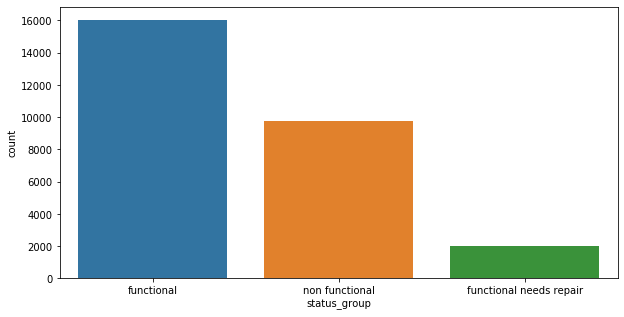

In [97]:
#Count status group
plt.figure(figsize=(10,5))
sns.countplot(train.status_group)
#mostly are functional, then non-functional, less number of pumps needs repair

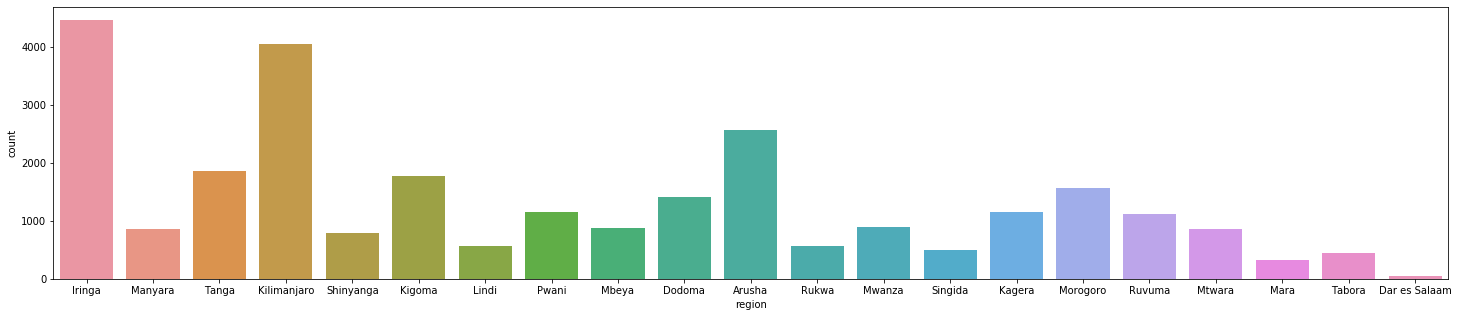

In [98]:
#looking at regions
plt.figure(figsize=(25, 5))
sns.countplot(train.region)
# Capital of Tanzania(Dodoma) has very few pumps, maybe other sources of water are available in that region

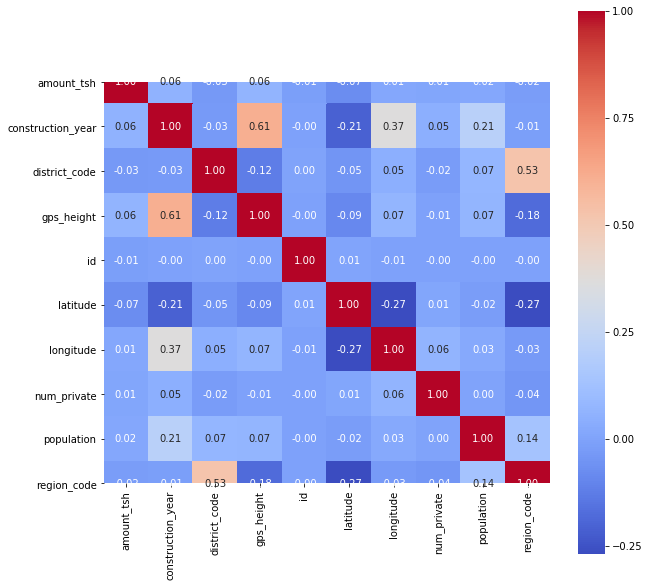

In [99]:
# heatmap of corelations between numerical variables 
plt.figure(figsize=(10,10))
sns.heatmap(test_train.corr(), square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


The feature 'construction_year' seems to be correlated with 'gps_height', indicating that maybe pumps located in the mountains were built more recently than pumps at lower altitudes. There also seems to be positive correlation between 'region_code' and'district_code'. Finally, we observe a mild correlation between 'latitude' and 'longitude'and between 'longitude' and'construction_year'.In general we do not observe extremely large positive or negative correlations between features.

## Data Preprocessing

In [100]:
train.describe

<bound method NDFrame.describe of        amount_tsh       basin  construction_year date_recorded  district_code  \
0          6000.0  Lake Nyasa             1999.0     3/14/2011            5.0   
2            25.0     Pangani             2009.0     2/25/2013            4.0   
5            20.0     Pangani             2009.0     3/13/2011            8.0   
13            0.0     Pangani             2009.0     3/15/2013            7.0   
14            0.0    Internal                0.0    10/20/2012            6.0   
...           ...         ...                ...           ...            ...   
59381         0.0     Pangani             1992.0     3/16/2011            8.0   
59382         6.0     Pangani             2008.0      8/3/2013            4.0   
59391         0.0     Pangani             1967.0      8/3/2013            3.0   
59395        10.0     Pangani             1999.0      5/3/2013            5.0   
59396      4700.0      Rufiji             1996.0      5/7/2011            4

In [101]:
#Remove unnecessary features
train['recorded_by'].unique()
#recorded_by has no unique values

array(['GeoData Consultants Ltd'], dtype=object)

In [102]:
#Removed recorded_by
train.drop('recorded_by', axis=1)

,amount_tsh,basin,construction_year,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,funder,gps_height,...,source,source_class,source_type,status_group,subvillage,ward,water_quality,waterpoint_type,waterpoint_type_group,wpt_name
0,6000.0,Lake Nyasa,1999.0,3/14/2011,5.0,gravity,gravity,gravity,Roman,1390.0,...,spring,groundwater,spring,functional,Mnyusi B,Mundindi,soft,communal standpipe,communal standpipe,none
2,25.0,Pangani,2009.0,2/25/2013,4.0,gravity,gravity,gravity,Lottery Club,686.0,...,dam,surface,dam,functional,Majengo,Ngorika,soft,communal standpipe multiple,communal standpipe,Kwa Mahundi
5,20.0,Pangani,2009.0,3/13/2011,8.0,submersible,submersible,submersible,Mkinga Distric Coun,0.0,...,other,unknown,other,functional,Moa/Mwereme,Moa,salty,communal standpipe multiple,communal standpipe,Tajiri
13,0.0,Pangani,2009.0,3/15/2013,7.0,gravity,gravity,gravity,Lawatefuka Water Supply,1368.0,...,spring,groundwater,spring,functional,Omarini,Siha Kaskazini,soft,communal standpipe,communal standpipe,Kwa John Izack Mmari
14,0.0,Internal,0.0,10/20/2012,6.0,nira/tanira,handpump,nira/tanira,Biore,0.0,...,shallow well,groundwater,shallow well,functional,Mwabasabi,Nkoma,soft,hand pump,hand pump,Mwabasabi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59381,0.0,Pangani,1992.0,3/16/2011,8.0,gravity,gravity,gravity,Mkinga Distric Coun,0.0,...,spring,groundwater,spring,non functional,Mtakuja A,Maramba,soft,communal standpipe,communal standpipe,Mijohoroni
59382,6.0,Pangani,2008.0,8/3/2013,4.0,gravity,gravity,gravity,Ces(gmbh),1383.0,...,spring,groundwater,spring,non functional,Yamu Juu,Kirua Vunjo Kusini,soft,communal standpipe,communal standpipe,Kwa Luka Msaki
59391,0.0,Pangani,1967.0,8/3/2013,3.0,gravity,gravity,gravity,Government Of Tanzania,540.0,...,river,surface,river/lake,non functional,Maore Kati,Maore,soft,communal standpipe,communal standpipe,Kwa
59395,10.0,Pangani,1999.0,5/3/2013,5.0,gravity,gravity,gravity,Germany Republi,1210.0,...,spring,groundwater,spring,functional,Kiduruni,Masama Magharibi,soft,communal standpipe,communal standpipe,Area Three Namba 27


In [103]:
# date is changed so that it can be used as a numerical value

train['date_recorded'] = pd.to_datetime(train['date_recorded'])
train['date_recorded']=train.date_recorded.astype('int64')

In [104]:
#Drop columns not necessary for the model
drop_list = ['waterpoint_type_group',
             'quality_group',
             'quality_group',
             'id',
             'source_type',
            ]
train = train.drop(drop_list,axis=1)

#waterpoint_type and waterpoint_type_group are same so we will drop watrpoint_type_group
#quantity and quantity_group are same so we will keep quantity
#source and source_type are same so we will drop source type
#id is not necessary
#water_quality and quality_group looks same so we will keep water_quality with more description

In [105]:
train.groupby(['region', 'region_code', 'district_code']).size()
#regions have unique codes but district codes repeat within region

region  region_code  district_code
Arusha  2.0          2.0              1146
                     5.0               132
                     6.0               160
                     7.0               816
        24.0         30.0              309
                                      ... 
Tanga   4.0          4.0               109
                     5.0               101
                     6.0               231
                     7.0                23
                     8.0               288
Length: 111, dtype: int64

In [106]:
#categorical predictors that show similar information
train.groupby(['scheme_management', 'scheme_name']).size()

scheme_management  scheme_name              
Company            BFFS                           1
                   Bagamoyo Wate                 60
                   Bagamoyo wate                207
                   Borehole                       1
                   Borehole drilling project      1
                                               ... 
Water authority    Yongoma                       16
                   Zepalama                       4
                   no scheme                      9
                   pump                           2
                   water supply at Kalebejo       1
Length: 2927, dtype: int64

In [107]:
#remove scheme_name because too many different scheme types
train.drop('scheme_name', axis=1, inplace=True)

In [108]:
train.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       10040
other                  other             205
pay annually           annually         2266
pay monthly            monthly          5894
pay per bucket         per bucket       6133
pay when scheme fails  on failure       1210
unknown                unknown          2065
dtype: int64

In [109]:
#these look the same therefore keep one with more description i.e payment
train.drop('payment', axis=1, inplace=True)

In [110]:
# map each outcome to a number
train['status_group'] = train.status_group.map({'functional':0, 'functional needs repair':1, 'non functional':2})

In [111]:
train.head()

,amount_tsh,basin,construction_year,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,funder,gps_height,...,region_code,scheme_management,source,source_class,status_group,subvillage,ward,water_quality,waterpoint_type,wpt_name
0,6000.0,Lake Nyasa,1999.0,1300060800000000000,5.0,gravity,gravity,gravity,Roman,1390.0,...,11.0,VWC,spring,groundwater,0,Mnyusi B,Mundindi,soft,communal standpipe,none
2,25.0,Pangani,2009.0,1361750400000000000,4.0,gravity,gravity,gravity,Lottery Club,686.0,...,21.0,VWC,dam,surface,0,Majengo,Ngorika,soft,communal standpipe multiple,Kwa Mahundi
5,20.0,Pangani,2009.0,1299974400000000000,8.0,submersible,submersible,submersible,Mkinga Distric Coun,0.0,...,4.0,VWC,other,unknown,0,Moa/Mwereme,Moa,salty,communal standpipe multiple,Tajiri
13,0.0,Pangani,2009.0,1363305600000000000,7.0,gravity,gravity,gravity,Lawatefuka Water Supply,1368.0,...,3.0,Water Board,spring,groundwater,0,Omarini,Siha Kaskazini,soft,communal standpipe,Kwa John Izack Mmari
14,0.0,Internal,0.0,1350691200000000000,6.0,nira/tanira,handpump,nira/tanira,Biore,0.0,...,17.0,WUG,shallow well,groundwater,0,Mwabasabi,Nkoma,soft,hand pump,Mwabasabi


In [112]:
train['basin'].unique()

array(['Lake Nyasa', 'Pangani', 'Internal', 'Rufiji', 'Lake Tanganyika',
       'Ruvuma / Southern Coast', 'Wami / Ruvu', 'Lake Rukwa',
       'Lake Victoria'], dtype=object)

In [113]:
train['extraction_type'].unique()

array(['gravity', 'submersible', 'nira/tanira', 'india mark ii', 'ksb',
       'windmill', 'afridev', 'mono', 'other', 'swn 80', 'cemo',
       'other - swn 81', 'other - rope pump', 'other - play pump',
       'climax', 'india mark iii'], dtype=object)

In [114]:
train['extraction_type_class'].unique()

array(['gravity', 'submersible', 'handpump', 'wind-powered', 'motorpump',
       'other', 'rope pump'], dtype=object)

In [115]:
train['extraction_type_group'].unique()

array(['gravity', 'submersible', 'nira/tanira', 'india mark ii',
       'wind-powered', 'afridev', 'mono', 'other', 'swn 80',
       'other motorpump', 'other handpump', 'rope pump', 'india mark iii'],
      dtype=object)

In [116]:
# extraction_type_class , 'extraction_type_group' and 'extraction_type' are same so we will keep one
train.drop('extraction_type_class', axis=1, inplace=True)
train.drop('extraction_type_group', axis=1, inplace=True)

In [117]:
train['funder'].unique()

array(['Roman', 'Lottery Club', 'Mkinga Distric Coun',
       'Lawatefuka Water Supply', 'Biore', 'Unicef', 'Danida', 'Twe',
       'Isf', 'African Development Bank', 'Government Of Tanzania',
       'Sobodo', 'Private Individual', 'Undp', 'Kirde', 'Cefa',
       'Ces(gmbh)', 'European Union', 'World Vision', 'District Council',
       'Muwsa', 'Dwe/norad', 'Kkkt_makwale', 'Ces (gmbh)',
       'Olgilai Village Community', 'Roman Catholic', 'Norad', 'Adra',
       'Sema', 'Rc Church', 'Swisland/ Mount Meru Flowers', 'Swedish',
       'Water', 'Isf/tacare', 'Aict', 'Rwssp', 'Kiuma', 'Germany Republi',
       'Ruthe', 'Kkkt', 'Hesawa', 'Tasaf', 'Concern World Wide', 'Lips',
       'Sida', 'World Bank', 'Tanza', 'Shanta', 'Dwe', 'Oikos E.Afrika',
       'Donor', 'Secondary Schoo', 'Amref', 'Ministry Of Water',
       'Germany', 'Af', 'Wananchi', 'Fw', 'Dct', 'Africare',
       'Norad /government', 'Dhv', 'British Colonial Government', 'Tcrs',
       'Hans', 'Socie', 'Finw', 'Go', 'Cdtf', '

In [118]:
train['basin'] = train.status_group.map({'Lake Nyasa':0, 'Pangani':1, 'Internal':2, 'Rufiji':3, 'Lake Tanganyika':4,
                                         'Ruvuma':5, 'Southern Coast':5, 
                                         'Wami ':5,' Ruvu' :5, 'Wami':6,'Ruva':6,'Lake Rukwa':7,'Lake Victoria':8})

In [119]:
train['extraction_type'] = train.status_group.map({'gravity':0,'submersible':1,'nira':2,'tanira':2,'india mark ii':3,
                                                  'ksb':4,'windmill':5,'afridev':6,'mono':7,'other':8,'swn 80':9,'cemo':10,'other - swn 81':11,
                                                  'other - rope pump':12,'other - play pump': 13, 'climax':14,'india mark iii': 15})

In [120]:
feature_columns = ['funder',
 'installer',
 'scheme_management',
 'extraction_type',
 'management',
 'payment_type',
 'water_quality',
 'quantity',
'basin',
'amount_tsh','construction_year','district_code','gps_height','region_code']

In [121]:
train['funder'] = pd.factorize(train['funder'])[0]
train['installer'] = pd.factorize(train['installer'])[0]
train['scheme_management'] = pd.factorize(train['scheme_management'])[0]
train['extraction_type'] = pd.factorize(train['extraction_type'])[0]
train['management'] = pd.factorize(train['management'])[0]
train['payment_type'] = pd.factorize(train['payment_type'])[0]
train['water_quality'] = pd.factorize(train['water_quality'])[0]
train['quantity'] = pd.factorize(train['quantity'])[0]
train['basin'] = pd.factorize(train['basin'])[0]


In [122]:
train.dtypes

amount_tsh           float64
basin                  int64
construction_year    float64
date_recorded          int64
district_code        float64
extraction_type        int64
funder                 int64
gps_height           float64
installer              int64
latitude             float64
lga                   object
longitude            float64
management             int64
management_group      object
num_private          float64
payment_type           int64
permit                object
population           float64
public_meeting        object
quantity               int64
quantity_group        object
recorded_by           object
region                object
region_code          float64
scheme_management      int64
source                object
source_class          object
status_group           int64
subvillage            object
ward                  object
water_quality          int64
waterpoint_type       object
wpt_name              object
dtype: object

In [123]:
from sklearn.model_selection import train_test_split

X = train[feature_columns]
y = train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=1, stratify=y)

X_train.head()


,funder,installer,scheme_management,extraction_type,management,payment_type,water_quality,quantity,basin,amount_tsh,construction_year,district_code,gps_height,region_code
22475,5,110,0,-1,0,1,0,0,-1,50.0,1977.0,1.0,95.0,99.0
47481,73,67,0,-1,0,1,0,2,-1,0.0,0.0,4.0,0.0,1.0
7236,274,286,0,-1,0,3,0,0,-1,0.0,2003.0,3.0,1880.0,21.0
2156,56,50,0,-1,0,0,0,0,-1,3600.0,2007.0,3.0,1923.0,11.0
22691,45,4,4,-1,0,1,1,2,-1,0.0,0.0,2.0,0.0,14.0


In [125]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
#Cross Validation
kfold = KFold(n_splits=5, random_state=99)
model = LogisticRegression(C=5)
results = cross_val_score(model ,X_train, y_train, cv=kfold)
results

array([0.59568619, 0.58904399, 0.60384941, 0.60956007, 0.58777496])

In [128]:
#F1 score
model = LogisticRegression(random_state = 99)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73      2408
           1       0.00      0.00      0.00       302
           2       0.54      0.28      0.37      1462

    accuracy                           0.60      4172
   macro avg       0.39      0.39      0.37      4172
weighted avg       0.55      0.60      0.55      4172

